# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

# There is multiple drug regimens available for testing
# Mice weight vs Tumor volume has positive correlation +0.89
# Tumor in Male mices 2% higher than Female
# Infubinol and Ceftamin were tested on mice with higher tumor volume
# Capomulin and Ramicane were tested on mice with smaller tumor volume
# Capomulin was less effective during the first 20 days of testing (the tumor kept increasing in volume)
# Capomulin is more effective after the 20th day of experiment

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_df = pd.merge(study_results , mouse_metadata , how="left", on="Mouse ID")

# Display the data table for preview
mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
count_mice = mice_df["Mouse ID"].nunique()
count_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mice_df["Mouse ID"][mice_df.duplicated(subset=["Mouse ID", "Timepoint"])].drop_duplicates().values
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicat_row_series = mice_df["Mouse ID"].isin(duplicate_mice)
all_duplicate_rows = mice_df.loc[duplicat_row_series]
all_duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mice_df.loc[~duplicat_row_series]
clean_df

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].unique().size
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_df = clean_df.groupby(['Drug Regimen'])

summary_mean = summary_df['Tumor Volume (mm3)'].mean()
summary_med = summary_df['Tumor Volume (mm3)'].median()
summary_var = summary_df['Tumor Volume (mm3)'].var()
summary_std = summary_df['Tumor Volume (mm3)'].std()
summary_sem = summary_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
                        "Mean Tumor Volume": summary_mean,
                        "Median Tumor Volume" : summary_med,
                        "Tumor Volume Variance" : summary_var,
                        "Tumor Volume Std. Dev." : summary_std,
                        "Tumor Volume Std. Err." : summary_sem
                        })
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
grouped_summary_df = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

# Using the aggregation method, produce the same summary statistics in a single line
grouped_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

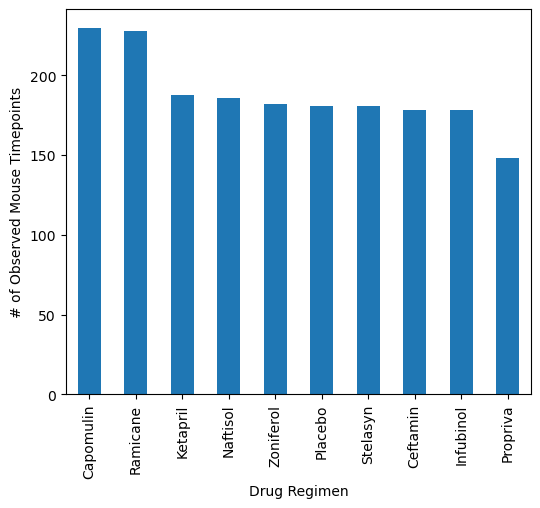

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint.sort_values(ascending=False).plot.bar(figsize=(6,5), fontsize = 10)  
plt.ylabel("# of Observed Mouse Timepoints",fontsize = 10)
plt.show()

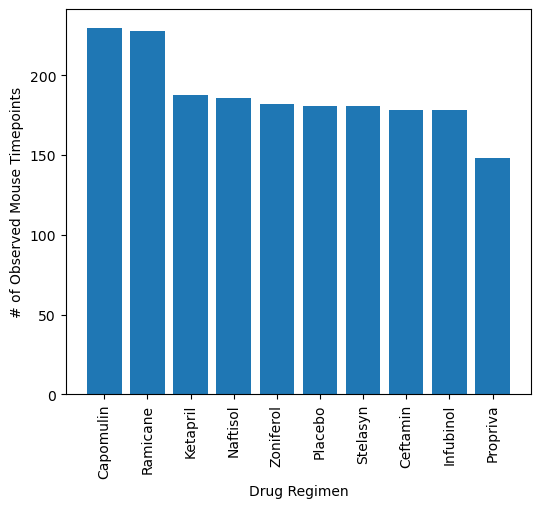

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_desc = timepoint.sort_values(ascending=False)
plt.figure(figsize=(6,5))                             
plt.bar(timepoint_desc.index, timepoint_desc.values)   
plt.xlabel('Drug Regimen', size=10)                    
plt.ylabel('# of Observed Mouse Timepoints', size=10)                  
plt.xticks(rotation='vertical')                        
plt.show()

<Axes: title={'center': 'Distribution of Unique Female vs. Male Mice'}, ylabel='Sex'>

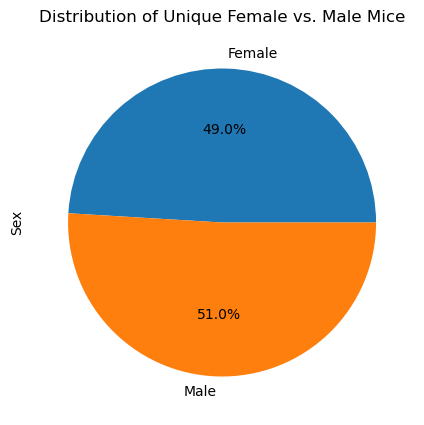

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_df.groupby(['Sex'])['Sex'].count() 
# gender

# Make the pie chart
gender.plot.pie(title="Distribution of Unique Female vs. Male Mice",autopct='%1.1f%%', figsize=(5, 5),fontsize = 10)

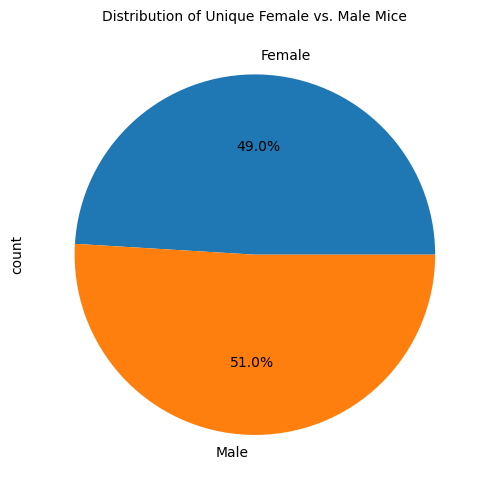

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_df.groupby(['Sex'])['Sex'].count() 
# gender

# Make the pie chart
plt.figure(figsize=(5,5))
plt.pie(gender, labels=('Female', 'Male'), autopct='%1.1f%%')
plt.title("Distribution of Unique Female vs. Male Mice",fontsize = 10) 
plt.ylabel('count', size=10)                                           
plt.tight_layout()                                       
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_grtst = clean_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
# timepoint_grtst

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_grtst = pd.DataFrame(timepoint_grtst)
timepoint_grtst = pd.merge(timepoint_grtst, clean_df, on=('Drug Regimen', 'Mouse ID', 'Timepoint'), how='left')
timepoint_grtst


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
medicine = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in medicine:
    volume_df = timepoint_grtst.loc[timepoint_grtst["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(volume_df)


quartiles = volume_df.quantile([0.25,0.5,0.75])

iqr = quartiles[0.75] - quartiles[0.25]
# iqr
l_bound = quartiles[0.25] - (1.5*iqr)
# l_bound
u_bound = quartiles[0.75] + (1.5*iqr)
# u_bound

    # add subset


    # Determine outliers using upper and lower bounds
outliers = volume_df.loc[(volume_df > u_bound) | (volume_df < l_bound)]
print(f"Outlier: {(outliers)}")



Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


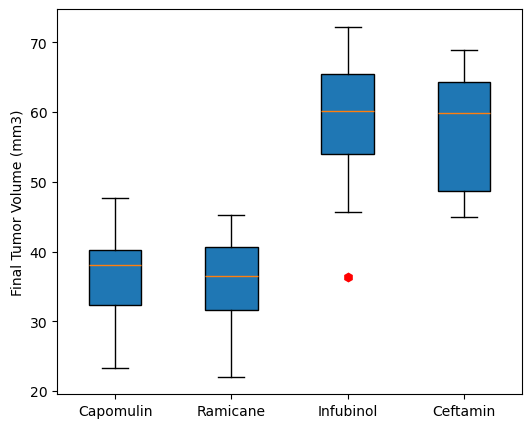

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor="r",marker="h", markeredgecolor="r")
fig1, ax1 = plt.subplots(figsize=(6,5))
ax1.boxplot(tumor_vol_data, flierprops=red_dot, patch_artist=True)
ax1.set_xlabel("",fontsize = 10)
ax1.set_ylabel("Final Tumor Volume (mm3)",fontsize = 10)
ax1.xaxis.set(ticks=range(1,len(medicine) + 1),ticklabels=medicine)

plt.show()

## Line and Scatter Plots

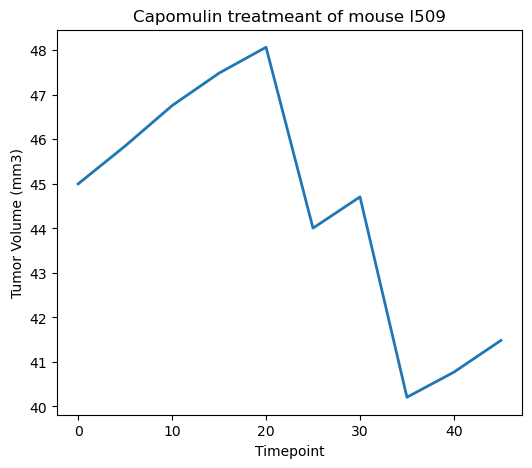

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
# line_plot_df

time = line_plot_df["Timepoint"]
vol = line_plot_df["Tumor Volume (mm3)"] 
# time, vol

#print(random_mouse["Mouse ID"])
plt.figure(figsize=(6,5))
line, = plt.plot(time, vol, linewidth=2, markersize=12)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of mouse l509")

plt.show()

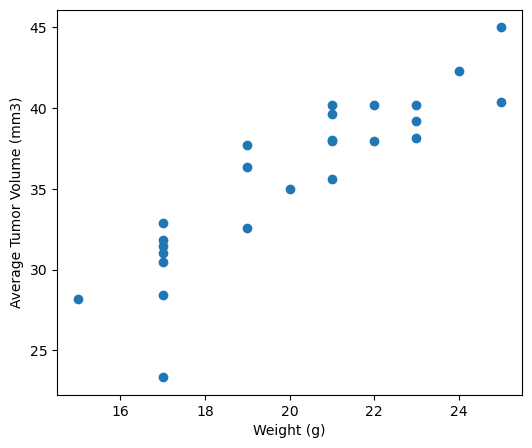

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
# scatter_plot_df

avg_volume = scatter_plot_df.groupby(['Mouse ID']).min()
avg_volume = pd.DataFrame(avg_volume)
# avg_volume

plt.figure(figsize=(6,5))
plt.scatter(avg_volume['Weight (g)'],avg_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
# plt.ylim(2)
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is 0.89


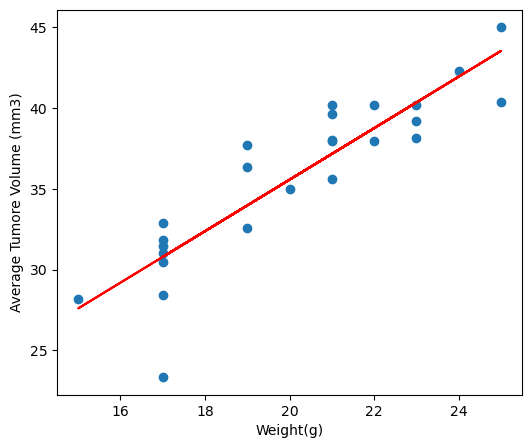

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# correlation=round(st.pearsonr(avg_volume['Weight (g)'],avg_volume['Tumor Volume (mm3)'])[0],2)

correlation = round(avg_volume['Weight (g)'].corr(avg_volume['Tumor Volume (mm3)']), 2)
print(f"The correlation between mouse weight and average observed tumor volume for the entire Capomulin regimen is {correlation}")

lin_reg=st.linregress(avg_volume['Weight (g)'],avg_volume['Tumor Volume (mm3)'])
lin_reg 

slope = lin_reg[0]
intercept = lin_reg[1]
rvalue = lin_reg[2]
pvalue = lin_reg[3]
stderr = lin_reg[4]

line = slope*(avg_volume['Weight (g)'])+intercept

plt.figure(figsize=(6,5))
plt.scatter(avg_volume['Weight (g)'],avg_volume['Tumor Volume (mm3)'])
plt.plot(avg_volume['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')   
plt.show()
